In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data=pd.read_csv('general_data.csv')

In [38]:
data.shape

(4410, 24)

In [39]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [40]:
data.head();
data.isnull().any();

In [41]:
print(data['TotalWorkingYears'].isnull().sum())
print(data['NumCompaniesWorked'].isnull().sum())

9
19


In [42]:
data['TotalWorkingYears']=data1['TotalWorkingYears'].fillna(data1['TotalWorkingYears'].mode()[0])
data['NumCompaniesWorked']=data1['NumCompaniesWorked'].fillna(data1['NumCompaniesWorked'].mode()[0])

In [43]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
data['Attrition']=en.fit_transform(data['Attrition'])
data['BusinessTravel']=en.fit_transform(data['BusinessTravel'])
data['Department']=en.fit_transform(data['Department'])
data['EducationField']=en.fit_transform(data['EducationField'])
data['Gender']=en.fit_transform(data['Gender'])
data['JobRole']=en.fit_transform(data['JobRole'])
data['MaritalStatus']=en.fit_transform(data['MaritalStatus'])

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [44]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [45]:
data.drop(['EmployeeCount','EmployeeID','StandardHours'],axis=1,inplace=True)#0 for rows

In [46]:
data.drop(['Over18'],axis=1,inplace=True)

In [72]:
data=data.sample(frac=1)
y=data['Attrition']
x=data.drop('Attrition',axis=1,inplace=False)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

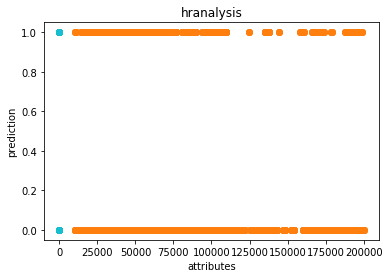

In [74]:
plt.plot(data,y,'o')
plt.title('hranalysis')
plt.xlabel('attributes')
plt.ylabel('prediction')
plt.show()

In [82]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
reg=LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\Pangayar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
y_pred=reg.predict(x_test)

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8537414965986394
[[748   8]
 [121   5]]


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       756
           1       0.38      0.04      0.07       126

   micro avg       0.85      0.85      0.85       882
   macro avg       0.62      0.51      0.50       882
weighted avg       0.79      0.85      0.80       882

